## Fast Food Habit Analysis

To develop a model which predict the preferred mode of contact. 

In [64]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Dataset

In [65]:
# Read data path

food = pd.read_csv('/content/FastFood.csv')
food.head()

,Timestamp,What age group do you fall under?,Which is your gender?,What would you say accurately matches your personality in a group discussion?,Choose all the options that are close to where you reside.,How often do you eat from fast foods each month?,What does your purchase mostly consist of? [Nigerian dishes],What does your purchase mostly consist of? [Burger],What does your purchase mostly consist of? [Pizza],What does your purchase mostly consist of? [Small chops],...,"When it comes to ordering, which do you prefer the most?",What is the best way to reach you for special offers/Discounts?,What about a fast food restaurant endears you to them? [Their special offers],What about a fast food restaurant endears you to them? [The quality],What about a fast food restaurant endears you to them? [Value for your money],What about a fast food restaurant endears you to them? [Excellent service],What about a fast food restaurant endears you to them? [Convenience],What about a fast food restaurant endears you to them? [Price],What about a fast food restaurant endears you to them? [Social media savviness],What do you consider yourself to be the most?
0,2018/09/07 4:16:15 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Victoria Island;Ikoyi,More than 10,Most likely,Most likely,Likely,Highly Unlikely,...,Order online and get delivered,Via Emails,Indifferent,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,A Shawarma Expert
1,2018/09/07 4:32:02 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Lekki Phase 1,7 - 10,Highly Unlikely,Likely,Likely,Most likely,...,Order in a physical store and takeaway,Via SMS,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Indifferent,A Jollof Warrior
2,2018/09/07 5:12:57 PM GMT+1,25 - 34,Male,"Passionate, I sometimes over talk.",Victoria Island;Ikoyi;Lekki Phase 1;Gbagada,4 - 6,Likely,Highly Unlikely,Most likely,Likely,...,Order online and pick up,Via SMS,Agree,Agree,Strongly Agree,Strongly Agree,Stongly Disagrre,Agree,Agree,A Jollof Warrior
3,2018/09/07 5:39:48 PM GMT+1,18 - 25,Female,"Passionate, I sometimes over talk.",Lekki Phase 1,4 - 6,Most likely,Likely,Most likely,Likely,...,Order online and get delivered;Order online an...,Via SMS,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Indifferent,Strongly Agree,Indifferent,A Pizza Connoisseur
4,2018/09/07 5:59:52 PM GMT+1,25 - 34,Female,"Passionate, I sometimes over talk.",Gbagada,4 - 6,Most likely,Highly Unlikely,Highly Unlikely,Likely,...,Order online and get delivered;Order in a phys...,In-stores,Indifferent,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Indifferent,Small chops Supremacist


In [66]:
# check the columns
food.columns 

Index(['Timestamp', 'What age group do you fall under?',
       'Which is your gender?',
       'What would you say accurately matches your personality in a group discussion?',
       'Choose all the options that are close to where you reside.',
       'How often do you eat from fast foods each month?',
       'What does your purchase mostly consist of?  [Nigerian dishes]',
       'What does your purchase mostly consist of?  [Burger]',
       'What does your purchase mostly consist of?  [Pizza]',
       'What does your purchase mostly consist of?  [Small chops]',
       'What does your purchase mostly consist of?  [Shawarma]',
       'What do you look for when choosing a fast food restaurant?',
       'Which of the following have you been to at least twice in the last 2 months',
       'When it comes to ordering, which do you prefer the most?',
       'What is the best way to reach you for special offers/Discounts?',
       'What about a fast food restaurant endears you to them? [Their

In [67]:
# Renaming the headers

food.rename(columns={'Timestamp': 'Date',
                   'What age group do you fall under?': 'Age',
                   'Which is your gender?': 'Gender',
                   'What would you say accurately matches your personality in a group discussion?': 'Personality',
                   'Choose all the options that are close to where you reside.': 'Place_of_Residence',
                   'How often do you eat from fast foods each month?': 'No_of_times',
                   'What does your purchase mostly consist of?  [Nigerian dishes]': 'Purchase_Nigerian_dishes',
                   'What does your purchase mostly consist of?  [Burger]' : 'Purchase_Burger',
                   'What does your purchase mostly consist of?  [Pizza]': 'Purchase_Pizza',
                   'What does your purchase mostly consist of?  [Small chops]': 'Purchase_Small_Chops',
                   'What does your purchase mostly consist of?  [Shawarma]': 'Purchase_Shawarma',
                   'What do you look for when choosing a fast food restaurant?': 'FFR_Preference',
                   'Which of the following have you been to at least twice in the last 2 months': 'Preference_L2months',
                   'When it comes to ordering, which do you prefer the most?': 'Favourite_Order',
                   'What is the best way to reach you for special offers/Discounts?': 'Preferred_contact',
                   'What about a fast food restaurant endears you to them? [Their special offers]': 'Special_Offers',
                   'What about a fast food restaurant endears you to them? [The quality]': 'Quality',
                   'What about a fast food restaurant endears you to them? [Value for your money]': 'Services',
                   'What about a fast food restaurant endears you to them? [Excellent service]': 'Excellent_Services',
                   'What about a fast food restaurant endears you to them? [Convenience]': 'Convenience',
                   'What about a fast food restaurant endears you to them? [Price]': 'Price',
                   'What about a fast food restaurant endears you to them? [Social media savviness]': 'Social_MS',
                   'What do you consider yourself to be the most?' : 'FF_Avatar'}, inplace = True)
food.head(1)

,Date,Age,Gender,Personality,Place_of_Residence,No_of_times,Purchase_Nigerian_dishes,Purchase_Burger,Purchase_Pizza,Purchase_Small_Chops,...,Favourite_Order,Preferred_contact,Special_Offers,Quality,Services,Excellent_Services,Convenience,Price,Social_MS,FF_Avatar
0,2018/09/07 4:16:15 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Victoria Island;Ikoyi,More than 10,Most likely,Most likely,Likely,Highly Unlikely,...,Order online and get delivered,Via Emails,Indifferent,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,A Shawarma Expert


In [68]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      441 non-null    object
 1   Age                       441 non-null    object
 2   Gender                    441 non-null    object
 3   Personality               440 non-null    object
 4   Place_of_Residence        421 non-null    object
 5   No_of_times               441 non-null    object
 6   Purchase_Nigerian_dishes  441 non-null    object
 7   Purchase_Burger           441 non-null    object
 8   Purchase_Pizza            441 non-null    object
 9   Purchase_Small_Chops      441 non-null    object
 10  Purchase_Shawarma         441 non-null    object
 11  FFR_Preference            441 non-null    object
 12  Preference_L2months       441 non-null    object
 13  Favourite_Order           441 non-null    object
 14  Preferred_contact         

In [69]:
# Check missing values 

food.isnull().sum()

Date                         0
Age                          0
Gender                       0
Personality                  1
Place_of_Residence          20
No_of_times                  0
Purchase_Nigerian_dishes     0
Purchase_Burger              0
Purchase_Pizza               0
Purchase_Small_Chops         0
Purchase_Shawarma            0
FFR_Preference               0
Preference_L2months          0
Favourite_Order              0
Preferred_contact            0
Special_Offers               0
Quality                      0
Services                     0
Excellent_Services           0
Convenience                  0
Price                        0
Social_MS                    0
FF_Avatar                    0
dtype: int64

## Data Cleaning

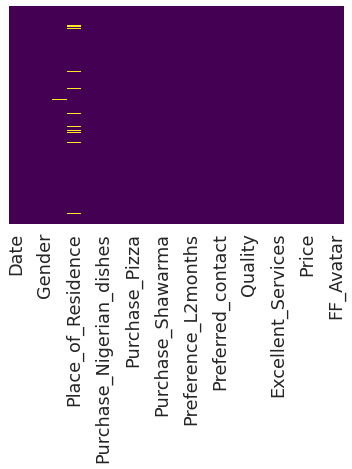

In [70]:
sns.heatmap(food.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
# Impute missing values using fill down function
food.ffill(axis = 0, inplace= True)

In [72]:
# Define fuction for trimming 
def _clean_string(x):
  return x.strip()
food['Preferred_contact']= food['Preferred_contact'].apply(_clean_string).values
food['Favourite_Order']= food['Favourite_Order'].apply(_clean_string).values
food['Place_of_Residence']= food['Place_of_Residence'].apply(_clean_string).values


In [73]:
# Grouped Favourite_Order values 
food['Favourite_Order'].replace(to_replace=["Order in a physical store and dine in","Order in a physical store and dine in;Order in a physical store and takeaway","Order in a physical store and dine in;Order online and pick up;Order in a physical store and takeaway",
                                            "Order in a physical store and dine in;Order online and pick up"],  
             value="In_store", inplace = True)

food['Favourite_Order'].replace(to_replace=["Order online and get delivered","Order online and get delivered;Order in a physical store and takeaway","Order online and get delivered;Order in a physical store and dine in","Order online and get delivered;Order in a physical store and dine in",
                                            "Order online and get delivered;Order online and pick up","Order online and get delivered;Order online and pick up;Order in a physical store and takeaway" ],  
             value="order_online", inplace = True)
food['Favourite_Order'].replace(to_replace=["Order in a physical store and takeaway","Order online and pick up","Order online and get delivered;Order in a physical store and dine in;Order online and pick up;Order in a physical store and takeaway",
                                            "Order online and pick up;Order in a physical store and takeaway","Order online and get delivered;Order in a physical store and dine in;Order in a physical store and takeaway" ],  
             value="Takeaway", inplace = True)

food['Place_of_Residence'].replace(to_replace=["Victoria Island;Ikoyi;Lekki Phase 1", "Lekki Phase 1;Gbagada", "Ikoyi;Lekki Phase 1","Victoria Island;Lekki Phase 1", "Victoria Island;Magodo;Ikoyi;Lekki Phase 1"],  
             value="Lekki Phase 1", inplace = True)
food['Place_of_Residence'].replace(to_replace=["Victoria Island;Ikoyi;Gbagada", "Victoria Island;Ikoyi", "Victoria Island;Ikoyi;Lekki Phase 1;Gbagada", "Ikoyi;Gbagada"],  
             value="Ikoyi", inplace = True)
food['Place_of_Residence'].replace(to_replace=["Magodo;Gbagada","Victoria Island;Magodo;Ikoyi;Lekki Phase 1;Gbagada","Magodo;Lekki Phase 1;Gbagada","Magodo;Ikoyi", "Magodo;Ikoyi;Gbagada","Magodo;Lekki Phase 1"],  
             value="Magodo", inplace = True)
food['Place_of_Residence'].replace(to_replace=["Victoria Island;Magodo;Lekki Phase 1;Gbagada","Victoria Island;Magodo;Gbagada", "Victoria Island;Magodo;Ikoyi;Gbagada", "Victoria Island;Gbagada", "Gbagada" ],  
             value="Gbagada ", inplace = True)

food['Preferred_contact'].replace(to_replace=["Social media platforms","Through social media","Instagram","An app belonging to the restaurant", 'In-stores','SocialMedia','Social_Media', 'Social Media',
       'Social media', 'Online ads'],value="Via Emails", inplace = True)


food['No_of_times'].replace(to_replace=["More than 10"],value=">10", inplace = True)

In [74]:
food['Preferred_contact'].unique()

array(['Via Emails', 'Via SMS'], dtype=object)

In [75]:
# Replace age and print in dataframe
food['Age'].replace(to_replace=["18 - 25",'21'],
             value="18 - 24", inplace = True)
grouped = food.groupby('Age')
pd.DataFrame(grouped['Gender'].value_counts())

Gender
Age     Gender        
16      Female       1
18 - 24 Female     147
        Male        60
25 - 34 Female     109
        Male        89
35 - 39 Female      12
        Male        10
40+     Male         9
        Female       4

## Exploratory Data Analysis

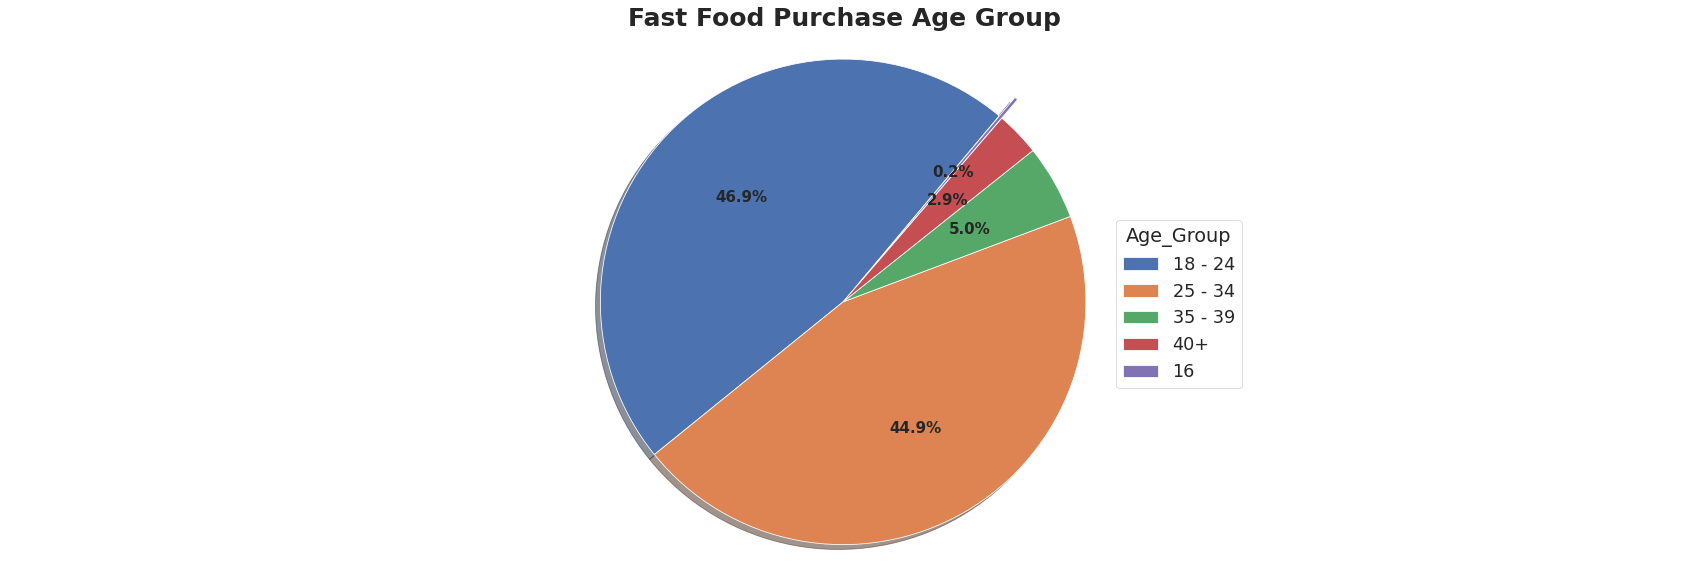

In [76]:
fig1, ax1 = plt.subplots(figsize=(30, 10), sharey=True)
Age_Group = ['18 - 24','25 - 34', '35 - 39', '40+','16']
wedges, texts, autotexts =ax1.pie(food['Age'].value_counts(),explode = (0, 0, 0, 0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=50)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.legend(wedges, Age_Group,
          title="Age_Group",
          loc="center",
          bbox_to_anchor=(0.45, 0.5, 0.5, 0))
plt.setp(autotexts, size=15, weight="bold")
ax1.set_title("Fast Food Purchase Age Group",size=25, weight="bold")
plt.show()

Text(0, 0.5, 'Count')

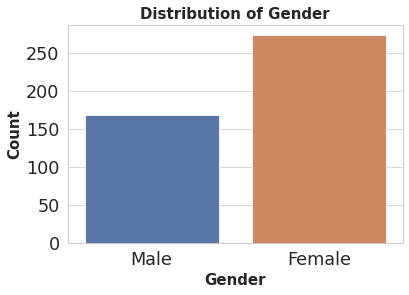

In [77]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=food);
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2)
plt.title('Distribution of Gender', size=15, weight="bold");
plt.xlabel('Gender',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")

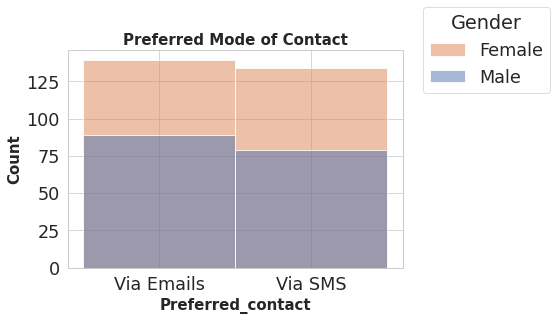

In [78]:
# check Preferred_contact grouped by Gender
Gender = ['Female', 'Male']
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2) 
#sns.set(rc={"figure.figsize":(5, 5)})
sns.histplot(food, x = 'Preferred_contact', hue = 'Gender')
plt.title('Preferred Mode of Contact', size=15, weight="bold");
plt.xlabel('Preferred_contact',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")
plt.legend(Gender,
           title="Gender",
          loc="center",
          bbox_to_anchor=(1, 1, 0.5, 0))

Text(0, 0.5, 'Count')

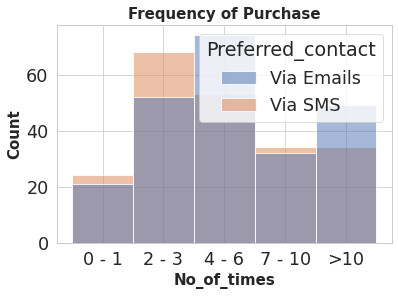

In [79]:
# check 'No_of_times' grouped by Gender
food.sort_values('No_of_times', inplace=True)
sns.histplot(food, x = 'No_of_times', hue = 'Preferred_contact')
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2)
plt.title('Frequency of Purchase', size=15, weight="bold");
plt.xlabel('No_of_times',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")

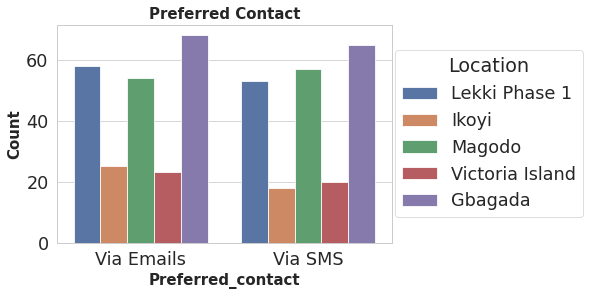

In [80]:
# preferred contact using location as hue
Location = ['Lekki Phase 1','Ikoyi','Magodo','Victoria Island','Gbagada']
sns.countplot(data= food,x='Preferred_contact',hue='Place_of_Residence')
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2) 
plt.title('Preferred Contact', size=15, weight="bold");
plt.xlabel('Preferred_contact',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")
plt.legend(Location,
           title="Location",
          loc="center",
          bbox_to_anchor=(1.04, 0.5, 0.5, 0))

In [81]:
food.columns

Index(['Date', 'Age', 'Gender', 'Personality', 'Place_of_Residence',
       'No_of_times', 'Purchase_Nigerian_dishes', 'Purchase_Burger',
       'Purchase_Pizza', 'Purchase_Small_Chops', 'Purchase_Shawarma',
       'FFR_Preference', 'Preference_L2months', 'Favourite_Order',
       'Preferred_contact', 'Special_Offers', 'Quality', 'Services',
       'Excellent_Services', 'Convenience', 'Price', 'Social_MS', 'FF_Avatar'],
      dtype='object')

In [82]:
# Get dummies 
dum = pd.get_dummies(food.drop(['Date', 'FF_Avatar', 'Personality','Preferred_contact'],  axis=1), prefix=[ 'Age', 'Gender', 'Place_of_Residence','No_of_times', 'Purchase_Nigerian_dishes', 'Purchase_Burger',
       'Purchase_Pizza', 'Purchase_Small_Chops', 'Purchase_Shawarma','FFR_Preference', 'Preference_L2months', 'Favourite_Order',
     'Special_Offers', 'Quality', 'Services','Excellent_Services', 'Convenience', 'Price', 'Social_MS'], drop_first=True)
dum


,Age_18 - 24,Age_25 - 34,Age_35 - 39,Age_40+,Gender_Male,Place_of_Residence_Ikoyi,Place_of_Residence_Lekki Phase 1,Place_of_Residence_Magodo,Place_of_Residence_Victoria Island,No_of_times_2 - 3,...,Excellent_Services_Strongly Agree,Convenience_Indifferent,Convenience_Stongly Disagrre,Convenience_Strongly Agree,Price_Indifferent,Price_Stongly Disagrre,Price_Strongly Agree,Social_MS_Indifferent,Social_MS_Stongly Disagrre,Social_MS_Strongly Agree
304,0,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,1,0,0
113,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
242,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
413,0,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
106,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
251,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
260,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
217,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,1,0,0


In [83]:
# Concatenate the airline data with the dummies
food.drop([ 'Date', 'FF_Avatar', 'Personality','Age', 'Gender', 'Place_of_Residence','No_of_times', 'Purchase_Nigerian_dishes', 'Purchase_Burger',
       'Purchase_Pizza', 'Purchase_Small_Chops', 'Purchase_Shawarma','FFR_Preference', 'Preference_L2months', 'Favourite_Order',
       'Special_Offers', 'Quality', 'Services','Excellent_Services', 'Convenience', 'Price', 'Social_MS'],axis = 1, inplace=True)
food = pd.concat([food, dum], axis = 1)
food

,Preferred_contact,Age_18 - 24,Age_25 - 34,Age_35 - 39,Age_40+,Gender_Male,Place_of_Residence_Ikoyi,Place_of_Residence_Lekki Phase 1,Place_of_Residence_Magodo,Place_of_Residence_Victoria Island,...,Excellent_Services_Strongly Agree,Convenience_Indifferent,Convenience_Stongly Disagrre,Convenience_Strongly Agree,Price_Indifferent,Price_Stongly Disagrre,Price_Strongly Agree,Social_MS_Indifferent,Social_MS_Stongly Disagrre,Social_MS_Strongly Agree
304,Via Emails,0,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
113,Via SMS,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
242,Via SMS,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
413,Via SMS,0,1,0,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
106,Via SMS,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Via Emails,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
251,Via SMS,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
260,Via Emails,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
217,Via Emails,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0


# Split Test and Train data

In [84]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [85]:
# split the data into features (X) and target (y)
X = food.drop(["Preferred_contact"], axis=1)
y = food["Preferred_contact"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.20, 
                                                    random_state=101)

In [87]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape


((352, 188), (89, 188), (352,), (89,))

In [88]:
from collections import Counter
counter = Counter()
counter.update(y_test)
counter

Counter({'Via SMS': 47, 'Via Emails': 42})

In [89]:
y_train

411    Via Emails
155       Via SMS
264       Via SMS
410       Via SMS
245       Via SMS
          ...    
15        Via SMS
23     Via Emails
254       Via SMS
313    Via Emails
191    Via Emails
Name: Preferred_contact, Length: 352, dtype: object

In [90]:
min_max_scaler = StandardScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Model and Evaluation with Logistic regression

### Training model

In [91]:
foodmodel = LogisticRegression()
foodmodel.fit(X_train,y_train)

LogisticRegression()

### Predictions

In [92]:
# Predict y_test 
predictions = foodmodel.predict(X_test)

In [93]:
# Predict y_train 
y_train_predict = foodmodel.predict(X_train)

### Evaluation

In [94]:
# check the accuracy score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.4606741573033708

In [95]:
# Get the classification report for logistic regression (y_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

  Via Emails       0.43      0.43      0.43        42
     Via SMS       0.49      0.49      0.49        47

    accuracy                           0.46        89
   macro avg       0.46      0.46      0.46        89
weighted avg       0.46      0.46      0.46        89



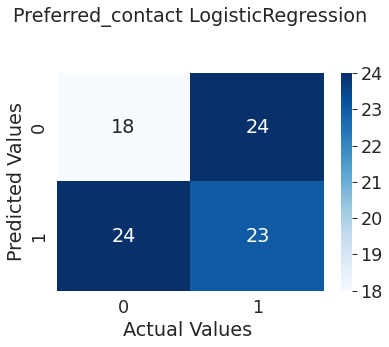

In [96]:
# Get the confusion matrix for logistic regression (y_test)
ax = sns.heatmap(confusion_matrix(y_test,predictions),annot=True, cmap='Blues')
ax.set_title('Preferred_contact LogisticRegression\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');

In [97]:
# Get the classification report for logistic regression (y_train)
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

  Via Emails       0.81      0.82      0.82       186
     Via SMS       0.79      0.79      0.79       166

    accuracy                           0.80       352
   macro avg       0.80      0.80      0.80       352
weighted avg       0.80      0.80      0.80       352



In [98]:
# visualize actual and predicted result
report2 = {"actual_y": y_test , "predicted_y": predictions}

#display.display(pd.DataFrame(report1))
df = pd.DataFrame(report2)
df

,actual_y,predicted_y
57,Via SMS,Via Emails
116,Via Emails,Via SMS
282,Via SMS,Via SMS
85,Via SMS,Via SMS
92,Via Emails,Via SMS
...,...,...
262,Via Emails,Via SMS
44,Via SMS,Via SMS
406,Via SMS,Via Emails
106,Via SMS,Via SMS


Text(0.5, 1.0, 'predicted_y')

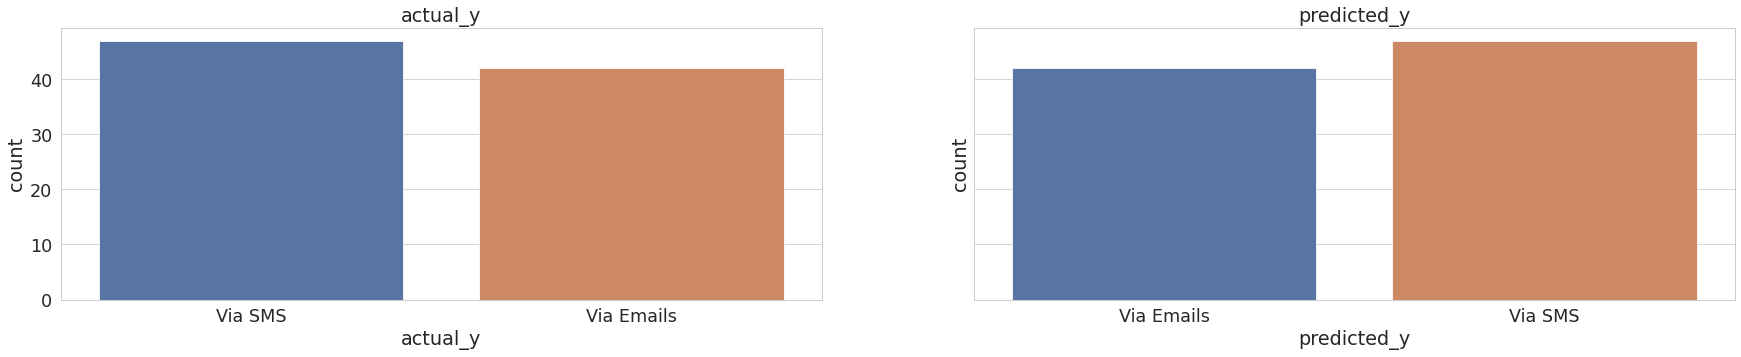

In [99]:
# visualize actual and predicted result
fig, axes = plt.subplots(1, 2, figsize=(30, 5), sharey=True)


# "actual_y"
sns.countplot(ax=axes[0],data= df,x= "actual_y")
axes[0].set_title(df["actual_y"].name)

# "predicted_y"
sns.countplot(ax=axes[1],data= df,x= "predicted_y")
axes[1].set_title(df["predicted_y"].name)



#  Decision tree Model and Evaluation

### Modelling using Decision Tree


In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
foodmodel = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=2, min_weight_fraction_leaf=0.0, 
                                   max_features=None, random_state=101, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
foodmodel.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3,
                       random_state=101)

## Predicting

In [102]:
predictions = foodmodel.predict(X_test)


In [103]:
y_train_predict = foodmodel.predict(X_train)

## Evaluate

In [104]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [105]:
# Get the classification report for Decision tree (y_test) 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

  Via Emails       0.48      0.50      0.49        42
     Via SMS       0.53      0.51      0.52        47

    accuracy                           0.51        89
   macro avg       0.51      0.51      0.51        89
weighted avg       0.51      0.51      0.51        89



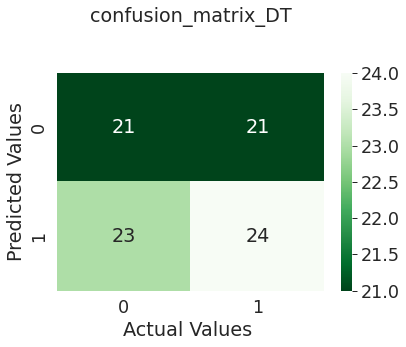

In [106]:
# Visualise the confusion matrix for Decision tree (y_test) 
ax=sns.heatmap(confusion_matrix(y_test,predictions),annot=True, cmap='Greens_r')
ax.set_title('confusion_matrix_DT\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');

In [107]:
# Get the classification report for Decision Tree (y_train) 
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

  Via Emails       0.92      0.96      0.94       186
     Via SMS       0.96      0.90      0.93       166

    accuracy                           0.93       352
   macro avg       0.94      0.93      0.93       352
weighted avg       0.94      0.93      0.93       352



# Model and Evaluate using RandomForest

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25)

In [121]:
accur=[]
for i in [1, 5, 10, 15, 20, 25, 35, 40]:
    rfc = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                              max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=101, verbose=0, 
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    accur.append(accuracy_score(y_test,rfc_pred))
accur

[0.4943820224719101,
 0.4157303370786517,
 0.5056179775280899,
 0.42696629213483145,
 0.4606741573033708,
 0.5280898876404494,
 0.5168539325842697,
 0.47191011235955055]

In [130]:
rfc_pred = rfc.predict(X_test)

In [127]:
y_train_predict = rfc.predict(X_train)

In [131]:
# Get the classification report for Random Forest (y_test) 
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

  Via Emails       0.50      0.62      0.55        42
     Via SMS       0.57      0.45      0.50        47

    accuracy                           0.53        89
   macro avg       0.53      0.53      0.53        89
weighted avg       0.54      0.53      0.53        89



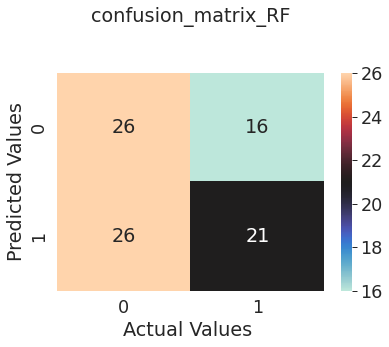

In [132]:
# Visualize the confusion matrix for Random Forest (y_test) 
ax=sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True, cmap='icefire')
ax.set_title('confusion_matrix_RF\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');

In [133]:
# Get the classification report for Decision Tree (y_train) 
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

  Via Emails       0.82      0.83      0.83       186
     Via SMS       0.81      0.80      0.80       166

    accuracy                           0.82       352
   macro avg       0.81      0.81      0.81       352
weighted avg       0.82      0.82      0.82       352

